# SABR Model Test Code

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import sys
#sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')
import pyfeng as pf
import option_models as opt

np.set_printoptions(precision=3)

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
forward = 100
sigma = 0.2
texp = 4
vov = 0.5
rho = -0.5
beta = 1

In [4]:
# Create model
sabr_bsm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=beta)
#sabr_bsm.__dict__

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward, texp)
bsm_vol = sabr_bsm.vol_smile(strike, forward, texp)

price, bsm_vol

(array([32.079, 30.519, 28.99 , 27.496, 26.038, 24.617, 23.236, 21.897,
        20.601, 19.35 , 18.146, 16.99 , 15.885, 14.83 , 13.827, 12.877,
        11.98 , 11.136, 10.344,  9.604,  8.914,  8.273,  7.678,  7.129,
         6.622]),
 array([0.243, 0.239, 0.234, 0.23 , 0.226, 0.223, 0.219, 0.215, 0.212,
        0.209, 0.206, 0.203, 0.2  , 0.198, 0.196, 0.193, 0.191, 0.19 ,
        0.188, 0.186, 0.185, 0.184, 0.183, 0.182, 0.181]))

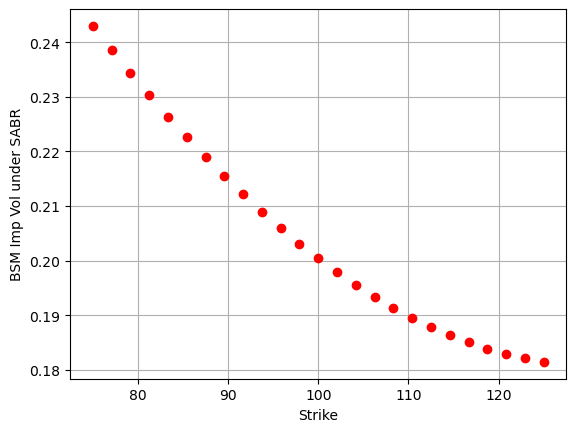

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (2) SABR for $\beta=0$

In [7]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 4
vov = 0.5
rho = -0.5

In [8]:
sabr_norm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=0)
price = sabr_norm.price(strike, forward, texp)
nvol = sabr_norm.vol_smile(strike, forward, texp, model='norm')

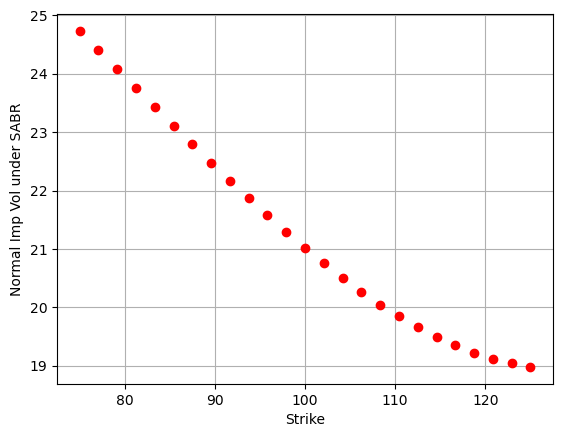

In [9]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (3) Smile calibration to 3 options

In [10]:
strike3 = np.array([90, 100, 110])
price3 = sabr_bsm.price(strike3, forward, texp)
vol3 = sabr_bsm.vol_smile(strike3, forward, texp)

price3, vol3

(array([21.634, 15.885, 11.301]), array([0.215, 0.2  , 0.19 ]))

In [11]:
sabr_bsm.__dict__

{'sigma': 0.2,
 'intr': 0.0,
 'divr': 0.0,
 'is_fwd': False,
 'vov': 0.5,
 'rho': -0.5,
 'beta': 1}

In [12]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(vol3, strike3, forward, texp, is_vol=True)

{'sigma': 0.1999999999944238,
 'vov': 0.5000000000095026,
 'rho': -0.4999999998878092}

In [13]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, texp, is_vol=False)

{'sigma': 0.19999999999442386,
 'vov': 0.5000000000094998,
 'rho': -0.49999999988780885}

## 2. Pricing under MC method

In [14]:
strike = np.linspace(75,125,num=25)
forward = 100

### (1) SABR for $\beta=1$

In [15]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.5, 'beta': 1}


In [16]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([32.079, 30.519, 28.99 , 27.496, 26.038, 24.617, 23.236, 21.897,
        20.601, 19.35 , 18.146, 16.99 , 15.885, 14.83 , 13.827, 12.877,
        11.98 , 11.136, 10.344,  9.604,  8.914,  8.273,  7.678,  7.129,
         6.622]),
 array([31.796, 30.241, 28.719, 27.235, 25.789, 24.382, 23.017, 21.695,
        20.415, 19.179, 17.988, 16.848, 15.76 , 14.725, 13.74 , 12.804,
        11.922, 11.094, 10.311,  9.577,  8.887,  8.247,  7.654,  7.104,
         6.595]))

### (2) SABR for $\beta=0$

In [17]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.5, 'beta': 0}


In [18]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([34.702, 33.039, 31.399, 29.784, 28.197, 26.64 , 25.114, 23.623,
        22.168, 20.753, 19.379, 18.051, 16.77 , 15.539, 14.361, 13.238,
        12.173, 11.167, 10.221,  9.336,  8.513,  7.75 ,  7.048,  6.403,
         5.813]),
 array([34.032, 32.4  , 30.796, 29.219, 27.674, 26.161, 24.683, 23.238,
        21.828, 20.456, 19.127, 17.846, 16.61 , 15.425, 14.291, 13.208,
        12.179, 11.21 , 10.301,  9.45 ,  8.657,  7.916,  7.227,  6.59 ,
         6.007]))

## 3. Pricing under conditional MC method

In [19]:
strike = np.linspace(75,125,num=25)
forward = 100

### (1) SABR for $\beta=1$

In [20]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.5, 'beta': 1}


In [21]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([32.079, 30.519, 28.99 , 27.496, 26.038, 24.617, 23.236, 21.897,
        20.601, 19.35 , 18.146, 16.99 , 15.885, 14.83 , 13.827, 12.877,
        11.98 , 11.136, 10.344,  9.604,  8.914,  8.273,  7.678,  7.129,
         6.622]),
 array([31.5  , 29.945, 28.424, 26.939, 25.493, 24.087, 22.722, 21.401,
        20.125, 18.896, 17.715, 16.583, 15.501, 14.471, 13.492, 12.566,
        11.691, 10.868, 10.095,  9.373,  8.699,  8.072,  7.49 ,  6.951,
         6.452]))

### (2) SABR for $\beta=0$

In [22]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormCondMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.5, 'beta': 0}


In [23]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([34.702, 33.039, 31.399, 29.784, 28.197, 26.64 , 25.114, 23.623,
        22.168, 20.753, 19.379, 18.051, 16.77 , 15.539, 14.361, 13.238,
        12.173, 11.167, 10.221,  9.336,  8.513,  7.75 ,  7.048,  6.403,
         5.813]),
 array([34.386, 32.739, 31.118, 29.525, 27.962, 26.431, 24.933, 23.472,
        22.049, 20.667, 19.327, 18.033, 16.786, 15.59 , 14.445, 13.354,
        12.318, 11.339, 10.417,  9.553,  8.746,  7.997,  7.303,  6.664,
         6.077]))

## 4. Compare the MC variance between regular vs conditional MC

### Repeat the pricing for 100 times and compare the mean and stdev of the results

In [24]:
strike = np.linspace(75,125,num=25)
forward = 100

In [25]:
price_bsm_hagan = sabr_bsm.price(strike, forward, texp)
price_norm_hagan = sabr_norm.price(strike, forward, texp)

In [26]:
price_bsm_hagan, price_norm_hagan

(array([32.079, 30.519, 28.99 , 27.496, 26.038, 24.617, 23.236, 21.897,
        20.601, 19.35 , 18.146, 16.99 , 15.885, 14.83 , 13.827, 12.877,
        11.98 , 11.136, 10.344,  9.604,  8.914,  8.273,  7.678,  7.129,
         6.622]),
 array([34.702, 33.039, 31.399, 29.784, 28.197, 26.64 , 25.114, 23.623,
        22.168, 20.753, 19.379, 18.051, 16.77 , 15.539, 14.361, 13.238,
        12.173, 11.167, 10.221,  9.336,  8.513,  7.75 ,  7.048,  6.403,
         5.813]))

In [27]:
price_bsm_mc = np.array([sabr_bsm_mc.price(strike, forward, texp) for i in range(100)])
price_bsm_cmc = np.array([sabr_bsm_cmc.price(strike, forward, texp) for i in range(100)])
price_norm_mc = np.array([sabr_norm_mc.price(strike, forward, texp) for i in range(100)])
price_norm_cmc = np.array([sabr_norm_cmc.price(strike, forward, texp) for i in range(100)])

In [28]:
price_bsm_mc.mean(axis=0), price_bsm_cmc.mean(axis=0)

(array([31.423, 29.874, 28.361, 26.886, 25.449, 24.052, 22.698, 21.388,
        20.124, 18.906, 17.736, 16.615, 15.545, 14.525, 13.556, 12.639,
        11.772, 10.957, 10.191,  9.473,  8.803,  8.178,  7.598,  7.059,
         6.561]),
 array([31.435, 29.884, 28.367, 26.887, 25.446, 24.044, 22.685, 21.368,
        20.097, 18.872, 17.696, 16.568, 15.491, 14.464, 13.489, 12.566,
        11.695, 10.875, 10.105,  9.386,  8.714,  8.089,  7.508,  6.97 ,
         6.473]))

In [29]:
price_bsm_mc.std(axis=0), price_bsm_cmc.std(axis=0)

(array([0.378, 0.374, 0.37 , 0.365, 0.361, 0.357, 0.352, 0.348, 0.343,
        0.339, 0.334, 0.33 , 0.325, 0.32 , 0.316, 0.312, 0.308, 0.303,
        0.299, 0.294, 0.29 , 0.287, 0.283, 0.279, 0.275]),
 array([0.094, 0.09 , 0.085, 0.081, 0.076, 0.072, 0.067, 0.063, 0.059,
        0.056, 0.052, 0.049, 0.046, 0.043, 0.041, 0.039, 0.037, 0.036,
        0.035, 0.034, 0.034, 0.033, 0.033, 0.032, 0.032]))

Text(0.5, 1.0, 'Comparison of MC Standard Deviation (BSM)')

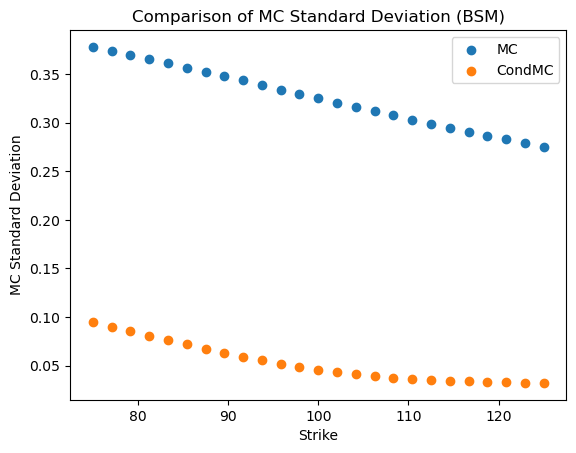

In [30]:
plt.scatter(strike, price_bsm_mc.std(axis=0), label='MC')
plt.scatter(strike, price_bsm_cmc.std(axis=0), label='CondMC')
plt.xlabel('Strike')
plt.ylabel('MC Standard Deviation')
plt.legend()
plt.title('Comparison of MC Standard Deviation (BSM)')

In [31]:
price_norm_mc.mean(axis=0), price_norm_cmc.mean(axis=0)

(array([34.387, 32.74 , 31.12 , 29.528, 27.966, 26.436, 24.94 , 23.48 ,
        22.058, 20.676, 19.338, 18.046, 16.801, 15.606, 14.462, 13.372,
        12.337, 11.358, 10.435,  9.57 ,  8.762,  8.011,  7.315,  6.673,
         6.082]),
 array([34.433, 32.783, 31.158, 29.562, 27.995, 26.459, 24.958, 23.492,
        22.065, 20.678, 19.334, 18.036, 16.785, 15.584, 14.435, 13.34 ,
        12.301, 11.319, 10.394,  9.528,  8.719,  7.969,  7.274,  6.634,
         6.047]))

In [32]:
price_norm_mc.std(axis=0), price_norm_cmc.std(axis=0)

(array([0.292, 0.286, 0.28 , 0.274, 0.268, 0.263, 0.257, 0.25 , 0.244,
        0.238, 0.232, 0.226, 0.221, 0.215, 0.21 , 0.204, 0.199, 0.194,
        0.189, 0.184, 0.179, 0.174, 0.169, 0.164, 0.158]),
 array([0.077, 0.074, 0.071, 0.068, 0.065, 0.063, 0.06 , 0.058, 0.056,
        0.054, 0.053, 0.051, 0.05 , 0.049, 0.048, 0.048, 0.047, 0.047,
        0.047, 0.047, 0.046, 0.046, 0.046, 0.045, 0.045]))

Text(0.5, 1.0, 'Comparison of MC Standard Deviation (Norm)')

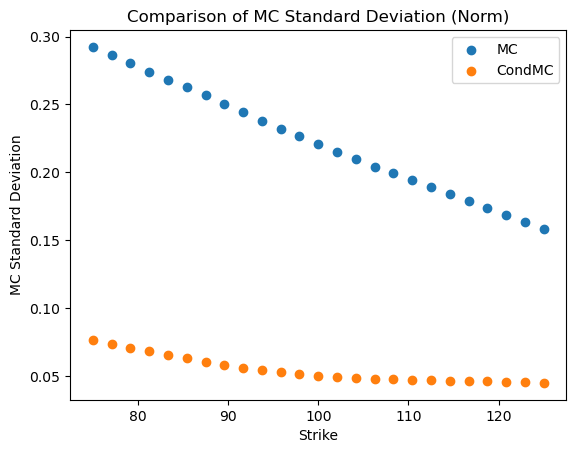

In [33]:
plt.scatter(strike, price_norm_mc.std(axis=0), label='MC')
plt.scatter(strike, price_norm_cmc.std(axis=0), label='CondMC')
plt.xlabel('Strike')
plt.ylabel('MC Standard Deviation')
plt.legend()
plt.title('Comparison of MC Standard Deviation (Norm)')